Question 1

In [104]:
#manual input if you want to play the game yourself
import random
x = random.randint(1,3)
y = int(input("Choose 1, 2, or 3: "))
if x == 1 and y == 1:
    z = 2 or 3
elif x == 1 and y == 2:
    z = 3
elif x == 1 and y == 3:
    z = 2
elif x == 2 and y == 1:
    z = 3
elif x == 2 and y == 2:
    z = 1 or 3
elif x == 2 and y == 3:
    z = 1
elif x == 3 and y == 1:
    z = 2
elif x == 3 and y == 2:
    z = 1
elif x == 3 and y == 3:
    z = 1 or 2
print("The correct door is not", z)
y2 = int(input("Input your final answer: "))
if y2 == x:
    print("You win!")
    print(x,y,z)
else:
    print("You lose.")
    print(x,y,z)

Choose 1, 2, or 3: 3
The correct door is not 1
Input your final answer: 2
You lose.
3 3 1


In [151]:
import random
probswitch = 0
probstay = 0

for n in range(0,501):
#when the contestant decides to switch
#x is the door with the prize, y is the door that the contestant chooses, and z is the other (incorrect) door
    x = random.randint(1,3)
    y = random.randint(1,3)
    z = 0
    if x == 1 and y == 1:
        z = int(random.choice([2, 3]))
    elif x == 1 and y == 2:
        z = 3
    elif x == 1 and y == 3:
        z = 2 
    elif x == 2 and y == 1:
        z = 3 
    elif x == 2 and y == 2:
        z = int(random.choice([1, 3]))
    elif x == 2 and y == 3:
        z = 1 
    elif x == 3 and y == 1:
        z = 2 
    elif x == 3 and y == 2:
        z = 1 
    elif x == 3 and y == 3:
        z = int(random.choice([1, 2])) 

    if z == 1:
        y2 = int(random.choice([2,3]))
    if z == 2:
        y2 = int(random.choice([1,3]))
    if z == 3:
        y2 = int(random.choice([1,2]))
    if y2 == x:
        probswitch += 1
print ("The probability of winning if you switch your answer is", round(((probswitch/500)*100),5), "percent.")


for n in range(0,501):
#when the contestant decides to keep their original guess
#x is the door with the prize and y is the door that the contestant chooses. In this case, the z door is irrelevant.
    x = random.randint(1,3)
    y = random.randint(1,3)
    if y == x:
        probstay += 1
print ("The probability of winning if you keep your answer is", round(((probstay/500)*100),5), "percent.")
print ("If you switch, your chances of winning are increased by",\
      round((((probswitch/500)*100) - ((probstay/500)*100)),5), "percentage points.")

The probability of winning if you switch your answer is 51.8 percent.
The probability of winning if you keep your answer is 33.8 percent.
If you switch, your chances of winning are increased by 18.0 percentage points.


Question 2

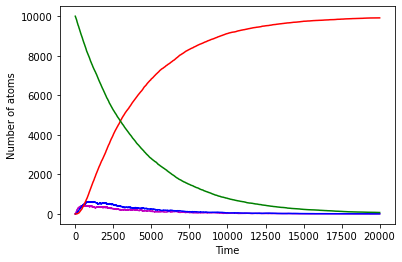

<Figure size 432x288 with 0 Axes>

In [158]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show
from matplotlib import pyplot as plt

NBi213 = 10000
NTl = 0
NPb = 0
NBi209 = 0
tauBi213 = 46*60
tauTl = 2.2*60
tauPb = 3.3*60
h = 1.0
pBi213 = 1 - 2**(-h/tauBi213)
pTl = 1 - 2**(-h/tauTl)
pPb = 1 - 2**(-h/tauPb)
tmax = 20000

tpoints = arange(0.0,tmax,h) # make time array
Bi213points = [] # empty array to strore # of Tl atoms at each time step
Tlpoints = [] # empty array to strore # of Pb atoms at each time step
Pbpoints = []
Bi209points = []

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Bi209points.append(NBi209) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms
    Tlpoints.append(NTl)
    Bi213points.append(NBi213)
    NdecayPb = 0
    NdecayTl = 0
    NdecayBi213toTl = 0
    NdecayBi213toPb = 0
        
    for i in range(NPb): # determine number of atoms that decay
        if random() < pPb:
            NdecayPb += 1
    NPb -= NdecayPb # subtract number of decayed Parent atoms 
    NBi209 += NdecayPb # add number of decayed Daughter atoms 
    for i in range(NTl): # determine number of atoms that decay
        if random() < pTl:
            NdecayTl += 1
    NTl -= NdecayTl # subtract number of decayed Parent atoms 
    NPb += NdecayTl
    for i in range(NBi213): # determine number of atoms that decay
        if random() < pBi213:
            if pBi213 <= 0.0209:
                NdecayBi213toTl += 1
            else:
                NdecayBi213toPb += 1
    NBi213 -= NdecayBi213toTl
    NBi213 -= NdecayBi213toPb
    NTl += NdecayBi213toTl
    NPb += NdecayBi213toPb

# Make the graph
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
plot(tpoints,Bi209points, c='r')
plot(tpoints,Bi213points, c='g')
xlabel("Time")
ylabel("Number of atoms")
show()
plt.savefig("Bismuth_Decay.png")